In [2]:
# in this lesson, we shall be looking at decision trees which is another classification technique any
# machine learning engineer must know
# we shall use some student data to predict whether or not a student will perform well in school

In [ ]:
some notes about decision trees
--at the start of a decision tree i.e. at the very top node, you need a feature that you can use to split the
tree and get other questions
--this feature is one where you can easily predict an outcome using a value from that feature column. for example
in the titanic dataset, sex would be a nice feature since it is easy to predict whether a person survived given
that they are either male or female.
--so in this case, the sex will be our first split.
-- in ML lingo, we say that this feature has a high information gain/entropy

--for each split, we find a value that has the highest information gain and we go on.

In [ ]:
--one thing that is common to most classification techniques be it regression, or naive bayes or decision trees
is that we must fit the model.
--and many times we fit the model using training data.

In [ ]:
questions
--what is scoring in decision trees?/ what does it mean to score a model
--when do we perform cross-validations, is it before making predictions or after that?

In [21]:
import pandas as pd
# import sklearn
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import math

from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn import tree

In [3]:
data = pd.read_csv("student-por.csv", sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# generate a binary label(pass/fail) based on the G1+G2+G3 columns and the threshold for passing is that the sum 
# must be greater or equal to 35
data['pass'] = data.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
data = data.drop(['G1', 'G2', 'G3'], axis=1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [5]:
# using one-hot encoding on categorical columns
# one-hot encoding means converting categorical columns into numerical columns
d = pd.get_dummies(data, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
                                     'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                                     'activities', 'nursery', 'higher', 'internet', 'romantic'])
# d.head()

In [6]:
# shuffle the rows
d = d.sample(frac=1)

# split the training and the test data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass =d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# train_data, test_data = train_test_split(d, test_size=0.2, random_state=12345)
# train_data, test_data

In [67]:
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(d_train_att, d_train_pass)

In [68]:
tree.export_graphviz(t, out_file="student_performance.dot", label="all", impurity=False, proportion=True, feature_names=list(d_train_att), class_names=["fail", "pass"], filled=True, rounded=True)

In [69]:
# checking the score of the tree using the testing set
# whereas this can help us evaluate the model, it is better to use a more comprehensive approach like
# the cross-validation technique.
t.score(d_test_att, d_test_pass)

0.7516778523489933

In [70]:
# this is the cross-validation i am talking about in the cell above. we use a technique called k-fold validation
# in the end, we get the average of all the scores
# read Machine learning for absolute beginners to understand cross validation better.
scores = cross_val_score(t, d_att, d_pass, cv=5)

print(f"This is the average of the scores from cros-validation: {scores.mean()}")

This is the average of the scores from cros-validation: 0.6873225998807395


In [46]:
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i, 0] = max_depth
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std() * 2
    i += 1
    
depth_acc

array([[ 1.        ,  0.63794872,  0.04533751],
       [ 2.        ,  0.68729875,  0.06356806],
       [ 3.        ,  0.6873226 ,  0.07430379],
       [ 4.        ,  0.66725104,  0.06856405],
       [ 5.        ,  0.69346452,  0.08565224],
       [ 6.        ,  0.68422182,  0.09680318],
       [ 7.        ,  0.67806798,  0.10351229],
       [ 8.        ,  0.66573643,  0.08502022],
       [ 9.        ,  0.67654144,  0.08400845],
       [10.        ,  0.64722719,  0.06408629],
       [11.        ,  0.6549672 ,  0.08469676],
       [12.        ,  0.65189028,  0.09057973],
       [13.        ,  0.65958259,  0.07840621],
       [14.        ,  0.66423375,  0.10647536],
       [15.        ,  0.64571258,  0.08282098],
       [16.        ,  0.65650566,  0.08483875],
       [17.        ,  0.66269529,  0.10135063],
       [18.        ,  0.66884914,  0.08880318],
       [19.        ,  0.65651759,  0.10243612]])

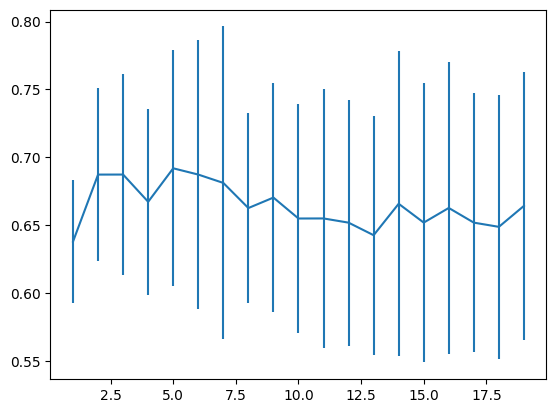

In [16]:
fig, ax = plot.subplots()
ax.errorbar(depth_acc[:, 0], depth_acc[:, 1], yerr=depth_acc[:, 2])
plot.show()

In [29]:
#using lambda functions
x = lambda n: n**n
x(9)

387420489